In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")
import torch
import numpy as np
import defmod as dm
import defmod.multimodule_usefulfunctions as mm 
import matplotlib.pyplot as plt
import defmod.registrationdata as regdata
import defmod.hamiltonian_multishape as hamiltonian
from defmod.energyfunctional import EnergyFunctional_unconstrained, EnergyFunctional
from defmod import optimize
import defmod.save_results as results

torch.set_default_tensor_type(torch.DoubleTensor)

In [2]:
data = regdata.Nut()
data()
source = data.source
target = data.target
module_list = data.modules
reduce_background = False

In [3]:
h = dm.hamiltonian.Hamiltonian(data.modules)
def attach(modules, target):
    return dm.attachement.VarifoldAttachement([1, 0.2])([modules.module_list[0].manifold.gd.view(-1,2) for i in range(len(target))], target)
E = EnergyFunctional_unconstrained(h.module, h, source, target, dim=2, gamma=0.01, attach=attach)

In [ ]:
gd0_tensor = torch.cat(h.module.manifold.unroll_gd().copy(),0).requires_grad_().view(-1)
mom0_tensor = torch.cat(h.module.manifold.unroll_cotan().copy(),0).requires_grad_().view(-1)
    
    
gd0_tensor_init = gd0_tensor.clone()
gd0_tensor.retain_grad()
mom0_tensor.retain_grad()
X = [gd0_tensor, mom0_tensor]

from defmod import optimize
X[1] = optimize.BFGS(E, X, disp=True)(maxiter=100)

In [ ]:

h.module.manifold.fill_gd(X[0])
h.module.manifold.fill_cotan(X[1])
save = results.Save_Results_SingleShape(h, source, target)

save.fig_states(True)

In [ ]:
xlim = [-3, 3]
ylim = [-2,2]
d = [0.2, 0.2]
_ = save.gridpoints(xlim, ylim, d)

#fig_states = save.fig_states(show=True)
fig_grid = save.fig_grid(True)

save.save('../results/Nut/Defmod/')
plt.close('all')

In [7]:
## LDDMM Module

man = dm.manifold.Landmarks(2, len(source[0]), gd = source[0].view(-1))
man_landmarks = dm.manifold.Landmarks(2, 3, gd = torch.tensor([[-1.,0.],[0.,0.], [1.,0.]], requires_grad=True).view(-1))
silent_landmarks = dm.deformationmodules.SilentPoints(man_landmarks)
module_LDDMM = dm.deformationmodules.CompoundModule([dm.deformationmodules.Translations(man, sigma=0.5)])
H_LDDMM = dm.hamiltonian.Hamiltonian([module_LDDMM])

#def attach(modules, target):
#    return dm.attachement.VarifoldAttachement([1, 0.2])([module_LDDMM.module_list[0].manifold.gd.view(-1,2) for i in range(len(target))], target)

reg_param = 1e-3
Energy_LDDMM = EnergyFunctional_unconstrained(module_LDDMM, H_LDDMM, source, target, dim=2, gamma=reg_param, attach=attach)
gd0 = torch.cat(module_LDDMM.manifold.unroll_gd())
mom0 = torch.cat(module_LDDMM.manifold.unroll_cotan())
X_LDDMM = [gd0, mom0]

X_LDDMM[1] = dm.optimize.BFGS(Energy_LDDMM, X_LDDMM, disp=True)(maxiter=250)

cost: 0.0 attach: 12.933211334882209
cost: 0.0 attach: 12.933211334882209
cost: 0.009631514284 attach: 28.92358047128018
cost: 0.009631514284 attach: 28.92358047128018
cost: 0.000595133328654 attach: 7.4572901783596075
cost: 0.000595133328654 attach: 7.4572901783596075
cost: 0.00336237040452 attach: 6.817489046636204
cost: 0.00336237040452 attach: 6.817489046636204
cost: 0.00144425655183 attach: 2.7974822855782966
cost: 0.00144425655183 attach: 2.7974822855782966
cost: 0.00511853726221 attach: 10.681742849633157
cost: 0.00511853726221 attach: 10.681742849633157
cost: 0.00189426808677 attach: 1.9231332703087665
cost: 0.00189426808677 attach: 1.9231332703087665
cost: 0.00250313549357 attach: 3.1461382538989477
cost: 0.00250313549357 attach: 3.1461382538989477
cost: 0.00200597522616 attach: 1.6851441090026258
cost: 0.00200597522616 attach: 1.6851441090026258
cost: 0.00215339822521 attach: 1.4229631997510728
cost: 0.00215339822521 attach: 1.4229631997510728
cost: 0.00239651397032 attach: 1

cost: 0.00343690341619 attach: 0.007804763924871949
cost: 0.00343690341619 attach: 0.007804763924871949
cost: 0.00341594996348 attach: 0.007480335443304398
cost: 0.00341594996348 attach: 0.007480335443304398
cost: 0.003406068723 attach: 0.00707897920871936
cost: 0.003406068723 attach: 0.00707897920871936
cost: 0.0033910850905 attach: 0.006855977332792307
cost: 0.0033910850905 attach: 0.006855977332792307
cost: 0.00341357783123 attach: 0.006720618539878487
cost: 0.00341357783123 attach: 0.006720618539878487
cost: 0.00342585427552 attach: 0.006614360343508707
cost: 0.00342585427552 attach: 0.006614360343508707
cost: 0.003477016451 attach: 0.007560683581512961
cost: 0.003477016451 attach: 0.007560683581512961
cost: 0.00343543148748 attach: 0.006621582927575531
cost: 0.00343543148748 attach: 0.006621582927575531
cost: 0.00343224065537 attach: 0.006506217798861513
cost: 0.00343224065537 attach: 0.006506217798861513
cost: 0.00341786288437 attach: 0.006462664933831519
cost: 0.00341786288437 a

cost: 0.00323502654736 attach: 0.002429954422805025
cost: 0.00323502654736 attach: 0.002429954422805025
cost: 0.00323356257864 attach: 0.0024174932322154064
cost: 0.00323356257864 attach: 0.0024174932322154064
cost: 0.00323239375574 attach: 0.0024022586761027753
cost: 0.00323239375574 attach: 0.0024022586761027753
cost: 0.00323340086263 attach: 0.0024147810534635994
cost: 0.00323340086263 attach: 0.0024147810534635994
cost: 0.00323267976747 attach: 0.0024049910546803943
cost: 0.00323267976747 attach: 0.0024049910546803943
cost: 0.00323137086722 attach: 0.0023844625149305188
cost: 0.00323137086722 attach: 0.0023844625149305188
cost: 0.00322961810098 attach: 0.002351933761751468
cost: 0.00322961810098 attach: 0.002351933761751468
cost: 0.00322771032356 attach: 0.002312656100617261
cost: 0.00322771032356 attach: 0.002312656100617261
cost: 0.00322837132978 attach: 0.0022729487210746413
cost: 0.00322837132978 attach: 0.0022729487210746413
cost: 0.00322945871668 attach: 0.0022323438189832956

cost: 0.00307156908299 attach: 0.0014991865833735574
cost: 0.00307156908299 attach: 0.0014991865833735574
cost: 0.00305942752689 attach: 0.0014936055798795422
cost: 0.00305942752689 attach: 0.0014936055798795422
cost: 0.00303882788267 attach: 0.0014946037032412818
cost: 0.00303882788267 attach: 0.0014946037032412818
cost: 0.00302679178012 attach: 0.0014820678676539245
cost: 0.00302679178012 attach: 0.0014820678676539245
cost: 0.00300292750888 attach: 0.0014814457521445945
cost: 0.00300292750888 attach: 0.0014814457521445945
cost: 0.00299916123849 attach: 0.0014580475016110483
cost: 0.00299916123849 attach: 0.0014580475016110483
cost: 0.00298842009327 attach: 0.0014434001954235498
cost: 0.00298842009327 attach: 0.0014434001954235498
cost: 0.00298094449849 attach: 0.0014229421164770883
cost: 0.00298094449849 attach: 0.0014229421164770883
cost: 0.00295432145468 attach: 0.0016666101786633192
cost: 0.00295432145468 attach: 0.0016666101786633192
cost: 0.00297343554282 attach: 0.0014389910797

cost: 0.00262273929041 attach: 0.0009803209400889301
cost: 0.00262273929041 attach: 0.0009803209400889301
cost: 0.00262140974322 attach: 0.0009723162718735523
cost: 0.00262140974322 attach: 0.0009723162718735523
cost: 0.00261668958288 attach: 0.0009692474606914914
cost: 0.00261668958288 attach: 0.0009692474606914914
         Current function value: 0.003586
         Iterations: 250
         Function evaluations: 320
         Gradient evaluations: 320


In [5]:
H_LDDMM.module.manifold.fill_gd(X_LDDMM[0])
H_LDDMM.module.manifold.fill_cotan(X_LDDMM[1])
H_LDDMM.geodesic_controls()
save = results.Save_Results_SingleShape(H_LDDMM, source, target)

xlim = [-5, 10]
ylim = [-5,5]
d = [0.2, 0.2]
_ = save.gridpoints(xlim, ylim, d)
#save.fig_grid(True)

save.save('../results/Nut/LDDMM/')
plt.close('all')

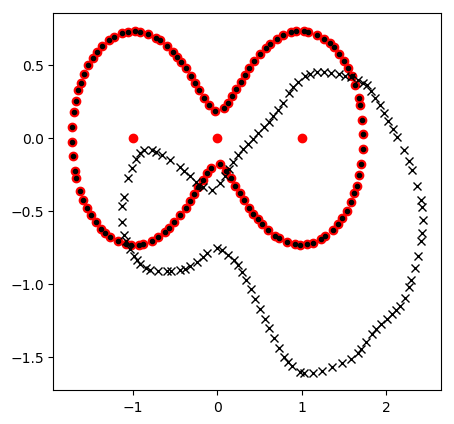

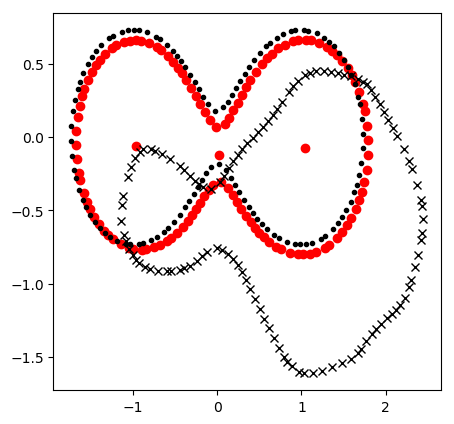

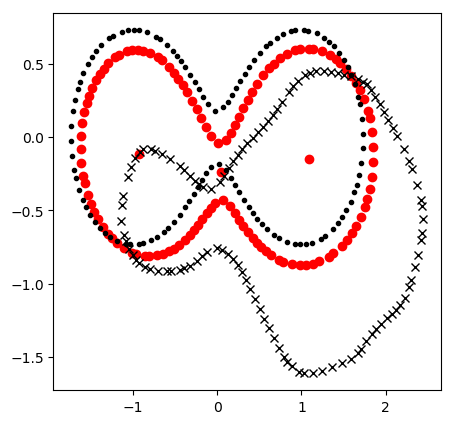

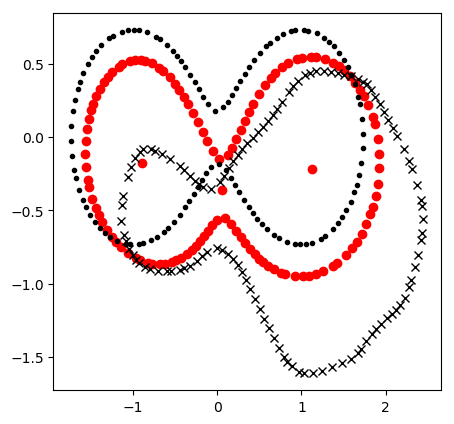

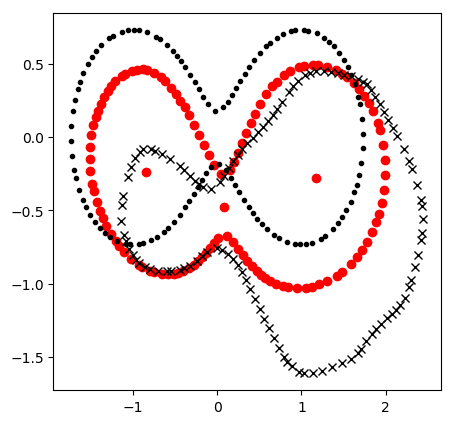

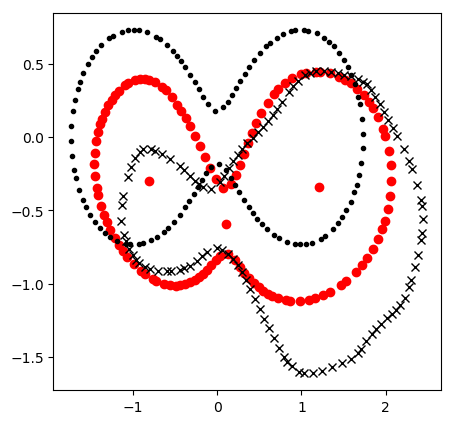

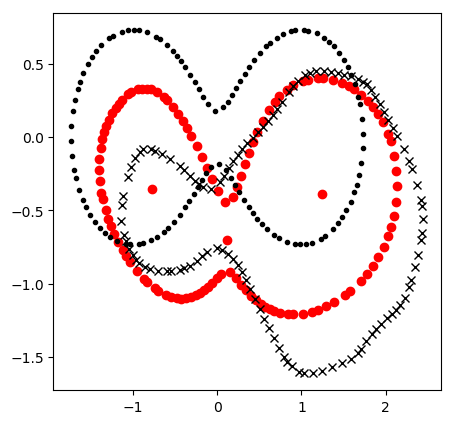

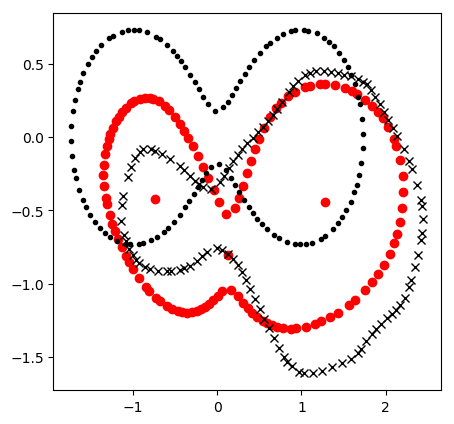

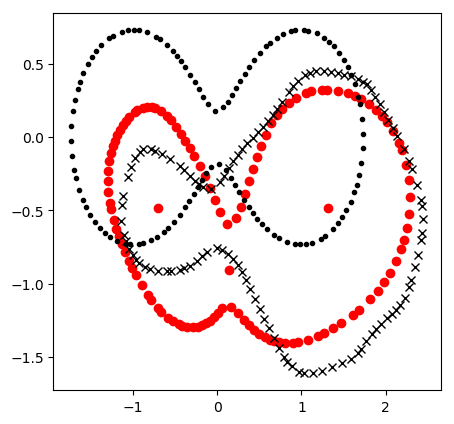

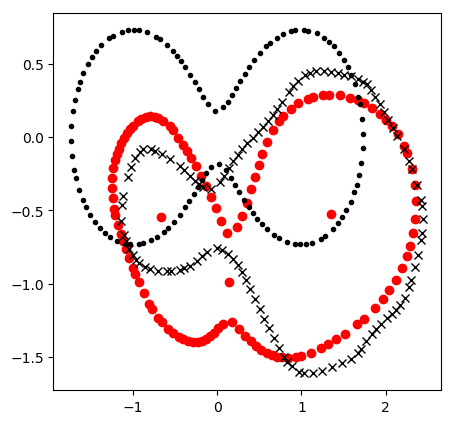

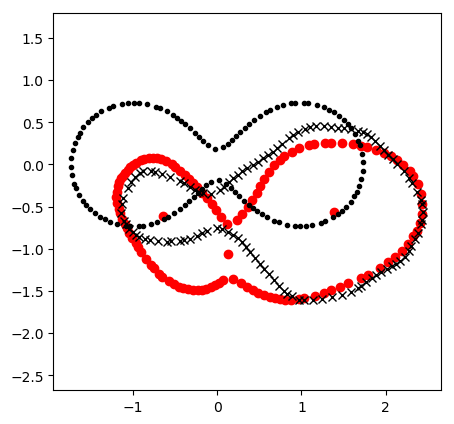

In [6]:
save.fig_states(True)

In [ ]:
save.fig_grid(True)

In [ ]:
h = hamiltonian.Hamiltonian_multi(modules, constr_Id)

def attach(modules, target):
    return dm.attachement.VarifoldAttachement([1, 0.2])([modules[0][0].manifold.gd.view(-1,2)], target)
E = EnergyFunctional_unconstrained(h.module, h, source, target, dim=2, gamma=0.01, attach=attach)

gd0_tensor = torch.cat(h.module.manifold.unroll_gd().copy(),0).requires_grad_().view(-1)
mom0_tensor = torch.cat(h.module.manifold.unroll_cotan().copy(),0).requires_grad_().view(-1)
    
    
gd0_tensor_init = gd0_tensor.clone()
gd0_tensor.retain_grad()
mom0_tensor.retain_grad()
X = [gd0_tensor, mom0_tensor]

from defmod import optimize
X[1] = optimize.BFGS(E, X, disp=True)(maxiter=100, gtol=1e-5, eps=1e-9)

In [ ]:
gd0_tensor = torch.cat(H.module.manifold.unroll_gd().copy(),0).requires_grad_().view(-1)
mom0_tensor = torch.cat(H.module.manifold.unroll_cotan().copy(),0).requires_grad_().view(-1)
    
    
gd0_tensor_init = gd0_tensor.clone()
gd0_tensor.retain_grad()
mom0_tensor.retain_grad()
X = [gd0_tensor, mom0_tensor]

def attach(modules, target):
    return dm.attachement.VarifoldAttachement([1, 0.2])([modules.module_list[i].module_list[0].manifold.gd.view(-1,2) for i in range(len(target))], target)

E = EnergyFunctional(H.module, H, constr_Id, source, target, dim=2, gamma=1., attach=attach)

In [ ]:
X[1] = optimize.BFGS(E, X, disp=True)(maxiter=20)

In [ ]:
def test_gradcheck_Hamiltonian():
    def hamiltonian(gd, mom):
        
        H.module.manifold.fill_gd(gd)
        H.module.manifold.fill_cotan(mom)
        H.geodesic_controls()
        return H()
    
    return torch.autograd.gradcheck(hamiltonian, (gd, mom), raise_exception=True)

gd = torch.cat(H.module.manifold.unroll_gd().copy()).requires_grad_().view(-1)
mom = torch.cat(H.module.manifold.unroll_cotan().copy()).requires_grad_().view(-1)


test_gradcheck_Hamiltonian()